In [1500]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [1501]:
Traindf=pd.read_csv(r'\autismdiagnosis\Autism_Prediction\train.csv')

In [1502]:
Traindf.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [1503]:
Traindf.describe(include='all')

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800,800,800,800,800,800,800.000000,800,800,800.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12,2,2,56,2,NaN,1,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,White-European,no,no,United States,no,NaN,18 and more,Self,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530,257,615,669,134,750,NaN,800,709,NaN
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,NaN,NaN,NaN,NaN,NaN,NaN,8.537303,NaN,NaN,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,NaN,NaN,NaN,NaN,NaN,NaN,4.807676,NaN,NaN,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,NaN,NaN,NaN,NaN,NaN,NaN,-6.137748,NaN,NaN,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,NaN,NaN,NaN,NaN,NaN,NaN,5.306575,NaN,NaN,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,NaN,NaN,NaN,NaN,NaN,NaN,9.605299,NaN,NaN,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,NaN,NaN,NaN,NaN,NaN,NaN,12.514484,NaN,NaN,0.000000


In [1504]:
Traindf['age_desc'].value_counts()

18 and more    800
Name: age_desc, dtype: int64

### Feature Elimination

In [1505]:
# Traindf=Traindf.drop(['ID','age_desc'],axis=1)

In [1506]:
Traindf=Traindf.drop(['ID','age_desc','gender','contry_of_res','used_app_before'],axis=1)

### MISSING VALUES

In [1507]:
Traindf.isna().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
ethnicity    0
jaundice     0
austim       0
result       0
relation     0
Class/ASD    0
dtype: int64

In [1508]:
Traindf = Traindf.replace(['?'],np.nan)

In [1509]:
Traindf.isna().sum()

A1_Score       0
A2_Score       0
A3_Score       0
A4_Score       0
A5_Score       0
A6_Score       0
A7_Score       0
A8_Score       0
A9_Score       0
A10_Score      0
age            0
ethnicity    203
jaundice       0
austim         0
result         0
relation      40
Class/ASD      0
dtype: int64

### FILLING MISSING VALUE WITH THE MODE

In [1510]:
for value in ['ethnicity','relation']:
    Traindf[value].fillna(Traindf[value].mode()[0],inplace=True)

In [1511]:
Traindf.isna().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
ethnicity    0
jaundice     0
austim       0
result       0
relation     0
Class/ASD    0
dtype: int64

### DETECTING OUTLIERS

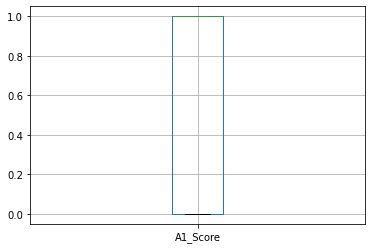

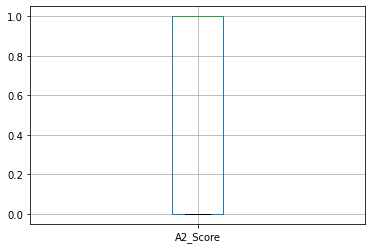

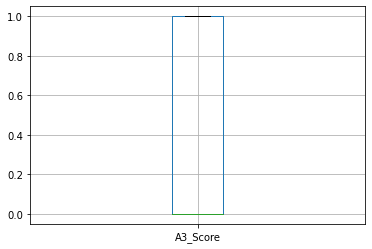

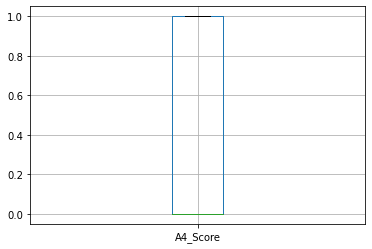

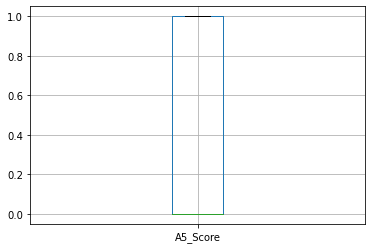

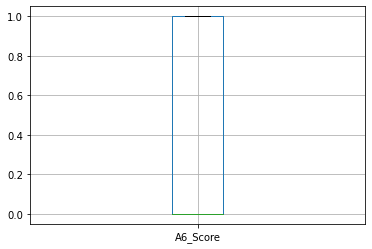

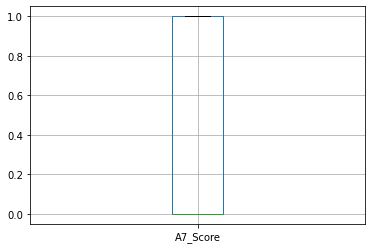

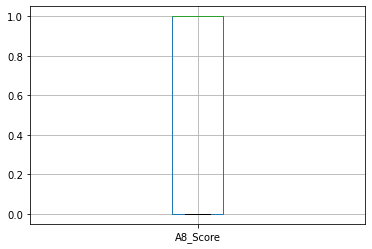

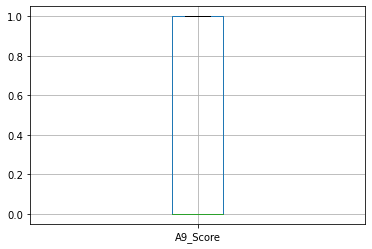

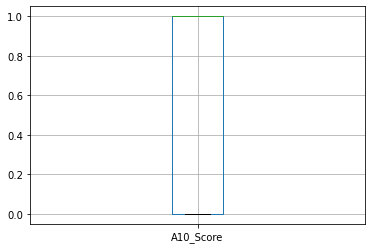

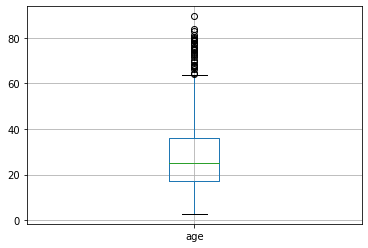

KeyError: "None of [Index(['ethnicity'], dtype='object')] are in the [columns]"

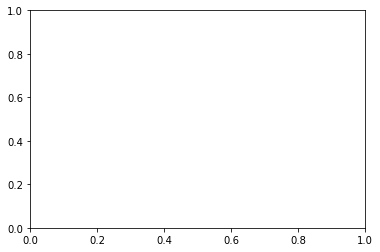

In [1512]:
for i in Traindf.columns:
    Traindf.boxplot(column=i)
    plt.show()

In [ ]:
Traindf['A1_Score'].value_counts()

In [ ]:
Traindf['gender'].value_counts()

In [ ]:
Traindf['austim'].value_counts()

In [ ]:
Traindf['jaundice'].value_counts()

In [ ]:
Traindf['relation'].value_counts()

In [ ]:
Traindf['Class/ASD'].value_counts()

In [1513]:
for i in Traindf.columns:
    if Traindf.dtypes[i]=='object':
        print(i,':', Traindf.dtypes[i])

ethnicity : object
jaundice : object
austim : object
relation : object


In [1514]:
Traindf['ethnicity'].value_counts()

White-European     460
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [1515]:
Traindf['ethnicity'].nunique()

11

In [1516]:
# Traindf_new = pd.get_dummies(Traindf)
# Traindf_new

### LABEL ENCODING

In [1517]:
colname=[]
for i in Traindf.columns:
    if Traindf.dtypes[i]=='object':
        colname.append(i)
colname

['ethnicity', 'jaundice', 'austim', 'relation']

In [1518]:
objCol=[i for i in Traindf.columns if Traindf.dtypes[i]=='object'] #Storing object columns in list

In [1519]:
objCol

['ethnicity', 'jaundice', 'austim', 'relation']

In [1520]:
#for preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for i in objCol:
    Traindf[i]=le.fit_transform(Traindf[i])
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature', i )
    print('mapping', le_name_mapping)

Feature ethnicity
mapping {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Latino': 3, 'Middle Eastern ': 4, 'Others': 5, 'Pasifika': 6, 'South Asian': 7, 'Turkish': 8, 'White-European': 9, 'others': 10}
Feature jaundice
mapping {'no': 0, 'yes': 1}
Feature austim
mapping {'no': 0, 'yes': 1}
Feature relation
mapping {'Health care professional': 0, 'Others': 1, 'Parent': 2, 'Relative': 3, 'Self': 4}


In [1521]:
Traindf.dtypes

A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
ethnicity      int32
jaundice       int32
austim         int32
result       float64
relation       int32
Class/ASD      int64
dtype: object

In [1522]:
X=Traindf.iloc[:,0:-1]
Y=Traindf['Class/ASD']

In [1523]:
X.shape

(800, 16)

In [1524]:
Y.shape

(800,)

### STANDARDIZATION

In [1525]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [1526]:
Y=Y.astype(int)

           A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
A1_Score   1.000000  0.401419  0.493016  0.383718  0.432912  0.371917   
A2_Score   0.401419  1.000000  0.489330  0.488173  0.427895  0.447721   
A3_Score   0.493016  0.489330  1.000000  0.558896  0.579769  0.511669   
A4_Score   0.383718  0.488173  0.558896  1.000000  0.559748  0.563543   
A5_Score   0.432912  0.427895  0.579769  0.559748  1.000000  0.494944   
A6_Score   0.371917  0.447721  0.511669  0.563543  0.494944  1.000000   
A7_Score   0.447262  0.452713  0.559118  0.554838  0.550663  0.496588   
A8_Score   0.191815  0.302040  0.315882  0.360781  0.292747  0.333694   
A9_Score   0.439397  0.511547  0.597022  0.576723  0.524624  0.536666   
A10_Score  0.390478  0.454422  0.510276  0.506292  0.436010  0.419172   
age        0.055083  0.083590  0.109924  0.102938  0.096364  0.058777   
ethnicity  0.131128  0.203495  0.240250  0.199992  0.195825  0.212923   
jaundice   0.127812  0.160084  0.183246  0.223980  

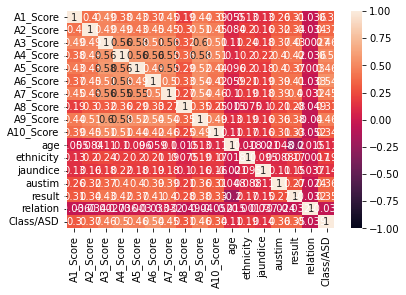

In [1527]:
corrdf=Traindf.corr(method="pearson")
print(corrdf)
sns.heatmap(corrdf,vmax=1.0,vmin=-1.0,annot=True)

### RUNNING A BASIC MODEL

In [1528]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_Train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [1529]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train,Y_Train)
# ypred=lr.predict(X_test)
# print(list(zip(Y_test,ypred)))

In [1530]:
# lr.intercept_

In [1531]:
# lr.coef_

In [1532]:
# list(zip(Traindf.columns[:-1],lr.coef_.ravel())) #ravel will convert 2d array to 1d array

In [1533]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,ypred)
# print('Confusion Matrix\n',cfm)

In [1534]:
# print('Classification Report:\n',classification_report(Y_test,ypred))
# print('Accuracy Score:',accuracy_score(Y_test,ypred))

### Adjusting the threshold

In [1535]:
# #store the predicted probabilities
# ypred_prob=lr.predict_proba(X_test)
# print(ypred_prob)

In [1536]:
# ypred_class=[]
# for val in ypred_prob[:,-1]:
#     if val>0.67:
#         ypred_class.append(1)
#     else:
#         ypred_class.append(0)
# print(ypred_class)

In [1537]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,ypred_class)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,ypred_class))
# print('Accuracy Score:',accuracy_score(Y_test,ypred_class))

In [1538]:
# #predicting using the Decision_Tree_classifier
# from sklearn.tree import DecisionTreeClassifier
# model_DecisionTree=DecisionTreeClassifier(criterion='gini',random_state=10)

# #fit the model on the data and predict the values
# model_DecisionTree.fit(X_train,Y_Train)   

In [1539]:
# Y_pred=model_DecisionTree.predict(X_test)

In [1540]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,Y_pred)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,ypred))
# print('Accuracy Score:',accuracy_score(Y_test,ypred))

In [1541]:
# #AUC at overall threshold
# from sklearn import metrics
# fpr,tpr,z=metrics.roc_curve(Y_test,ypred_prob[:,1])
# auc=metrics.auc(fpr,tpr)
# print(auc)

In [1542]:
# plt.title('Receiver Operating characterstic')
# plt.plot(fpr,tpr,'b',label=auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

In [1543]:
# #AUC at individual threshold
# from sklearn import metrics
# fpr,tpr,z=metrics.roc_curve(Y_test,ypred_class)
# auc=metrics.auc(fpr,tpr)
# print(auc)

In [1544]:
# #predicting using the Random_Forest_Classifier
# from sklearn.ensemble import RandomForestClassifier

# model_RandomForest=RandomForestClassifier(n_estimators=90, random_state=10)

# #fit the model on the data and predict the values
# model_RandomForest.fit(X_train,Y_Train)

# Y_pred=model_RandomForest.predict(X_test)

In [1545]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,Y_pred)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,Y_pred))
# print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

In [1546]:
# #predicting using the AdaBoost_Classifier
# from sklearn.ensemble import AdaBoostClassifier

# model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
#                                   n_estimators=10,
#                                   random_state=10)
# #fit the model on the data and predict the values
# model_AdaBoost.fit(X_train,Y_Train)
# Y_pred=model_AdaBoost.predict(X_test)

In [1547]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,Y_pred)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,Y_pred))
# print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

In [1548]:
# #predicting using the Gradient_Boosting_Classifier
# from sklearn.ensemble import GradientBoostingClassifier

# model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
#                                                   random_state=10)

# #fit the model on the data and predict the values
# model_GradientBoosting.fit(X_train,Y_Train)

# Y_pred=model_GradientBoosting.predict(X_test)


In [1549]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,Y_pred)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,Y_pred))
# print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

### Prediction using XGBOOST

In [1550]:
# from xgboost import XGBClassifier

# model_XGBoost=XGBClassifier(random_state=10)

# #fit the model on the data and predict the values
# model_XGBoost.fit(X_train,Y_Train)

# Y_pred=model_XGBoost.predict(X_test)

In [1551]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# cfm=confusion_matrix(Y_test,Y_pred)
# print('Confusion Matrix\n',cfm)
# print('Classification Report:\n',classification_report(Y_test,Y_pred))
# print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

### Upsampling

In [1552]:
Traindf['Class/ASD'].value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

In [1553]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = Traindf[Traindf['Class/ASD']==0]
df_minority = Traindf[Traindf['Class/ASD']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,  ## on data we have to sample         /  wheras in downsampling it would be df_majority
                                replace=True, # sample with replacement reandomly  /  replace = false as we dont have to select random sample from it
                                n_samples=639, # to match majority class        /   n_samples = 4668
                                random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['Class/ASD'].value_counts()

1    639
0    639
Name: Class/ASD, dtype: int64

In [1554]:
X=df_upsampled.values[:,0:-1]
Y=df_upsampled.values[:,-1]

### SMOTE

In [1491]:
# import site
# site.getsitepackages()

In [1492]:
# pip show imblearn

In [1494]:
# pip installed imbalanced-learn

In [1495]:
# !pip install scikit-learn==0.22.1

In [1496]:
# from imblearn.over_sampling import SMOTE

In [1497]:
# Y.value_counts()

In [1498]:
# sm = SMOTE(sampling_strategy = 'minority')
# X_smote,Y_smote = sm.fit_resample(X,Y)

In [1380]:
# from collections import Counter
# print('Before SMOTE : ',Counter(Y))
# print('After SMOTE : ',Counter(Y_smote))

Before SMOTE :  Counter({0: 639, 1: 161})
After SMOTE :  Counter({0: 639, 1: 639})


In [1381]:
# X=X_smote
# Y=Y_smote

### STANDARDIZATION

In [1560]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [1561]:
Y=Y.astype(int)

In [1562]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_Train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

### LOGISTIC REGRESSION

In [1563]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_Train)
ypred=lr_model.predict(X_test)

In [1564]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,ypred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,ypred))
print('Accuracy Score:',accuracy_score(Y_test,ypred))

Confusion Matrix
 [[156  41]
 [ 22 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       197
           1       0.80      0.88      0.84       187

    accuracy                           0.84       384
   macro avg       0.84      0.84      0.84       384
weighted avg       0.84      0.84      0.84       384

Accuracy Score: 0.8359375


### TUNING THE MODEL

In [1565]:
#store the predicted probabilities
ypred_prob=lr_model.predict_proba(X_test)
print(ypred_prob)

[[0.96592576 0.03407424]
 [0.35454869 0.64545131]
 [0.38736301 0.61263699]
 [0.0828591  0.9171409 ]
 [0.76989333 0.23010667]
 [0.15507773 0.84492227]
 [0.97269881 0.02730119]
 [0.96785677 0.03214323]
 [0.67898519 0.32101481]
 [0.91765324 0.08234676]
 [0.11056927 0.88943073]
 [0.64794458 0.35205542]
 [0.33668645 0.66331355]
 [0.9782417  0.0217583 ]
 [0.99046663 0.00953337]
 [0.95625337 0.04374663]
 [0.1000193  0.8999807 ]
 [0.10851545 0.89148455]
 [0.10314361 0.89685639]
 [0.07068714 0.92931286]
 [0.69467137 0.30532863]
 [0.09053414 0.90946586]
 [0.90484432 0.09515568]
 [0.98765824 0.01234176]
 [0.1040508  0.8959492 ]
 [0.97084986 0.02915014]
 [0.98741965 0.01258035]
 [0.15744473 0.84255527]
 [0.09631169 0.90368831]
 [0.33234137 0.66765863]
 [0.18013978 0.81986022]
 [0.40803343 0.59196657]
 [0.74603376 0.25396624]
 [0.9796009  0.0203991 ]
 [0.09764262 0.90235738]
 [0.98932391 0.01067609]
 [0.9702817  0.0297183 ]
 [0.1000193  0.8999807 ]
 [0.975356   0.024644  ]
 [0.33511897 0.66488103]


In [1566]:
ypred_class=[]
for val in ypred_prob[:,-1]:
    if val>0.62:
        ypred_class.append(1)
    else:
        ypred_class.append(0)
print(ypred_class)

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [1567]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,ypred_class)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,ypred_class))
print('Accuracy Score:',accuracy_score(Y_test,ypred_class))

Confusion Matrix
 [[166  31]
 [ 27 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       197
           1       0.84      0.86      0.85       187

    accuracy                           0.85       384
   macro avg       0.85      0.85      0.85       384
weighted avg       0.85      0.85      0.85       384

Accuracy Score: 0.8489583333333334


### RANDOM FOREST

In [1568]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=90, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_Train)

Y_pred=model_RandomForest.predict(X_test)

In [1569]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[174  23]
 [  5 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93       197
           1       0.89      0.97      0.93       187

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384

Accuracy Score: 0.9270833333333334


### ADABOOST

In [1570]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier

model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_Train)
Y_pred=model_AdaBoost.predict(X_test)

In [1571]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[169  28]
 [  8 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       197
           1       0.86      0.96      0.91       187

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384

Accuracy Score: 0.90625


### XGBOOST

In [1572]:
from xgboost import XGBClassifier

model_XGBoost=XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_Train)

Y_pred=model_XGBoost.predict(X_test)

In [1573]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[172  25]
 [  5 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       197
           1       0.88      0.97      0.92       187

    accuracy                           0.92       384
   macro avg       0.93      0.92      0.92       384
weighted avg       0.93      0.92      0.92       384

Accuracy Score: 0.921875


### GRADIENT BOOSTING

In [1574]:
#predicting using the Gradient_Boosting_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=450,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_Train)

Y_pred=model_GradientBoosting.predict(X_test)

In [1575]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[170  27]
 [  1 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       197
           1       0.87      0.99      0.93       187

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.94      0.93      0.93       384

Accuracy Score: 0.9270833333333334


### SVM

In [1576]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',C=1.0,gamma=0.1)
svc_model.fit(X_train,Y_Train)
print('Accuracy is :',svc_model.score(X_test,Y_test))

Accuracy is : 0.890625


In [1577]:
Y_pred = svc_model.predict(X_test)
print(list(Y_pred))

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [1578]:
svc_model.score(X_train,Y_Train)

0.9351230425055929

In [1579]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[165  32]
 [ 10 177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       197
           1       0.85      0.95      0.89       187

    accuracy                           0.89       384
   macro avg       0.89      0.89      0.89       384
weighted avg       0.90      0.89      0.89       384

Accuracy Score: 0.890625


### KNN

In [1580]:
## predicting using KNeighors_Classifer
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train))),metric = 'euclidean')
## fit the model on the data and predict the values
model_knn.fit(X_train,Y_Train)
Y_pred = model_knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 1), (0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0),

In [1581]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[148  49]
 [ 14 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       197
           1       0.78      0.93      0.85       187

    accuracy                           0.84       384
   macro avg       0.85      0.84      0.84       384
weighted avg       0.85      0.84      0.83       384

Accuracy Score: 0.8359375


### Recursive Feature Elimination (RFE)

RFE: 1st - All the independent variables will be considered and the model will be built. It will eliminate the variable which has the least significance in the model. 2nd - (X-1) variables will be considered and the model will be rebuilt. The process continues till the time we are left off with the given no of variables in the model. RFE model will be rerady to predict upon the testing data 

In [1582]:
colname=Traindf.columns

In [1583]:
from sklearn.feature_selection import RFE
rfe = RFE(lr_model,15)
model_rfe = rfe.fit(X_train, Y_Train)
print('Num Features: ',model_rfe.n_features_)
print('Selected Features: ')
print(list(zip(colname,model_rfe.support_)))
print('Feature Ranking: ',model_rfe.ranking_)

Num Features:  15
Selected Features: 
[('A1_Score', True), ('A2_Score', True), ('A3_Score', True), ('A4_Score', True), ('A5_Score', True), ('A6_Score', True), ('A7_Score', True), ('A8_Score', True), ('A9_Score', True), ('A10_Score', True), ('age', True), ('ethnicity', True), ('jaundice', True), ('austim', False), ('result', True), ('relation', True)]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


In [1584]:
Y_pred=model_rfe.predict(X_test)

In [1585]:
print(list(zip(Traindf.columns,model_DecisionTree.feature_importances_)))

[('A1_Score', 0.002133665966386557), ('A2_Score', 0.0), ('A3_Score', 0.034248674074268196), ('A4_Score', 0.02209007677366218), ('A5_Score', 0.012767627082884427), ('A6_Score', 0.28500833443967466), ('A7_Score', 0.05822199460592315), ('A8_Score', 0.07330500467607007), ('A9_Score', 0.03190122202727245), ('A10_Score', 0.007440476190476191), ('age', 0.17289125901553465), ('ethnicity', 0.05531966835846153), ('jaundice', 0.02164358241095306), ('austim', 0.0), ('result', 0.21363572800816263), ('relation', 0.009392686370270248)]


In [1586]:
print(list(zip(Traindf.columns,model_RandomForest.feature_importances_)))

[('A1_Score', 0.021357452643596415), ('A2_Score', 0.029869231614164073), ('A3_Score', 0.05538616369165408), ('A4_Score', 0.07105672518187256), ('A5_Score', 0.07704975938929073), ('A6_Score', 0.16388685216796728), ('A7_Score', 0.06130215852364214), ('A8_Score', 0.029078183676186288), ('A9_Score', 0.10666235870562393), ('A10_Score', 0.031402254304645376), ('age', 0.12116702664214392), ('ethnicity', 0.039702170326118905), ('jaundice', 0.01861414020316641), ('austim', 0.020904080900753217), ('result', 0.13753118751377424), ('relation', 0.01503025451540049)]


In [1587]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[156  41]
 [ 22 165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       197
           1       0.80      0.88      0.84       187

    accuracy                           0.84       384
   macro avg       0.84      0.84      0.84       384
weighted avg       0.84      0.84      0.84       384

Accuracy Score: 0.8359375


In [1588]:
from sklearn.neural_network import MLPClassifier

In [1589]:
mlp_gs = MLPClassifier(max_iter=100,early_stopping=True,n_iter_no_change=5,
                        random_state=10,learning_rate_init=0.01,learning_rate= 'constant',
                        verbose=True )
parameter_space = {
            'hidden_layer_sizes': [(12,12,12),(10,10)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.01]
}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5) 

In [1590]:
clf.fit(X_train,Y_Train)

Iteration 1, loss = 0.69170831
Validation score: 0.733333
Iteration 2, loss = 0.57136437
Validation score: 0.811111
Iteration 3, loss = 0.45088963
Validation score: 0.800000
Iteration 4, loss = 0.39531165
Validation score: 0.800000
Iteration 5, loss = 0.38321663
Validation score: 0.811111
Iteration 6, loss = 0.37686519
Validation score: 0.811111
Iteration 7, loss = 0.36211008
Validation score: 0.811111
Iteration 8, loss = 0.34370311
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True,
                                     learning_rate_init=0.01, max_iter=100,
                                     n_iter_no_change=5, random_state=10,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(12, 12, 12), (10, 10)],
                         'solver': ['sgd', 'adam']})

In [453]:
print('Best parameters found :\n',clf.best_params_)

Best parameters found :
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12, 12, 12), 'solver': 'adam'}


In [454]:
Y_pred = clf.predict(X_test)

In [455]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix\n',cfm)
print('Classification Report:\n',classification_report(Y_test,Y_pred))
print('Accuracy Score:',accuracy_score(Y_test,Y_pred))

Confusion Matrix
 [[163  34]
 [ 31 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       197
           1       0.82      0.83      0.83       187

    accuracy                           0.83       384
   macro avg       0.83      0.83      0.83       384
weighted avg       0.83      0.83      0.83       384

Accuracy Score: 0.8307291666666666


### K-FOLD CROSS VALIDATION

In [1476]:
classifier = LogisticRegression()
from sklearn.model_selection import KFold

In [1477]:
kfold_cv = KFold(n_splits=10,random_state=10)
from sklearn.model_selection import cross_val_score

In [1480]:
kfold_score = cross_val_score(estimator=classifier, X = X_train, y = Y_Train, cv = kfold_cv)
print(kfold_score)

[0.9        0.83333333 0.85555556 0.85555556 0.79775281 0.83146067
 0.80898876 0.87640449 0.78651685 0.82022472]


In [1484]:
print(kfold_score.mean())

0.8365792759051185


In [ ]:
#model tuning
for train_value, test_value

### WORKING ON TEST

In [1499]:
Testdf=pd.read_csv(r'\autismdiagnosis\Autism_Prediction\test.csv')
Testdf

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,0,0,1,0,0,1,1,1,23.099434,m,Black,no,no,Azerbaijan,no,-1.915659,18 and more,Self
196,197,1,0,0,0,0,0,0,0,0,1,13.935726,m,Others,no,no,India,no,0.520234,18 and more,Self
197,198,1,0,0,0,0,0,1,0,1,1,22.760041,m,?,no,no,New Zealand,no,3.498948,18 and more,?
198,199,0,1,0,0,0,0,0,1,0,1,24.352584,f,?,no,no,United States,no,5.594550,18 and more,Self


In [1465]:
Testdf=Testdf.drop(['ID','age_desc','gender','contry_of_res','used_app_before'],axis=1)

In [1466]:
Testdf = Testdf.replace(['?'],np.nan)

In [1467]:
for value in ['ethnicity','relation']:
    Testdf[value].fillna(Testdf[value].mode()[0],inplace=True)

In [1468]:
objTestCol=[i for i in Testdf.columns if Testdf.dtypes[i]=='object'] #Storing object columns in list

In [1469]:
#for preprocessing the data
le=preprocessing.LabelEncoder()
for i in objTestCol:
    Testdf[i]=le.fit_transform(Testdf[i])
    le_name_mapping=dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature', i )
    print('mapping', le_name_mapping)

Feature ethnicity
mapping {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Latino': 3, 'Middle Eastern ': 4, 'Others': 5, 'Pasifika': 6, 'South Asian': 7, 'Turkish': 8, 'White-European': 9}
Feature jaundice
mapping {'no': 0, 'yes': 1}
Feature austim
mapping {'no': 0, 'yes': 1}
Feature relation
mapping {'Health care professional': 0, 'Others': 1, 'Parent': 2, 'Relative': 3, 'Self': 4}


In [1470]:
X_test_new = Testdf

In [1471]:
X_test_new = scaler.transform(X_test_new)

In [1472]:
Y_pred=lr_model.predict(X_test_new)

In [1473]:
Testdf=pd.read_csv(r'\autismdiagnosis\Autism_Prediction\test.csv')
Testdf['Class/ASD']=Y_pred
Testdf.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self,1
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self,0
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self,0
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self,0


In [1474]:
Submission_file19 = Testdf[['ID','Class/ASD']]

In [1475]:
Submission_file19.to_csv(r'\autismdiagnosis\Autism_Prediction\Submission_file19.csv')

In [351]:
#Testdf['Y_predictions']=Testdf['Y_predictions'].map({0:'No',1:'Yes'})

In [352]:
#Testdf

In [706]:
Testdf['Class/ASD'].value_counts()

0    181
1     19
Name: Class/ASD, dtype: int64

In [346]:
# Y_pred_GB=model_GradientBoosting.predict(X_test_new)

In [347]:
# Testdf=pd.read_csv(r'\autismdiagnosis\Autism_Prediction\test.csv')
# Testdf['Y_predictions']=Y_pred_GB
# Testdf.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Y_predictions
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self,1
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self,0
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self,0
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self,0


In [348]:
# Testdf['Y_predictions'].value_counts()

0    161
1     39
Name: Y_predictions, dtype: int64